# 2D Rotation matrix demo

## Does rotation matrix even work?

$$
R = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$


In [2]:
import numpy as np
def rot2D(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

Let's construct an example, and then rotate it. We will write a letter M using 5 points and then rotate it.

(-0.1, 1.1)

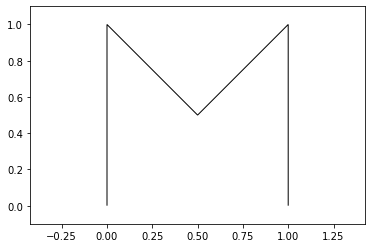

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mplb

# 5 corners of the letter M
path = np.array(
        [[0, 0.],
        [0, 1.],
        [.5, .5],
        [1., 1.],
        [1., 0.]])
def plot_path(ax, path, m='k'):
    ax.add_patch(mplb.patches.PathPatch(mplb.path.Path(path), fill=False, color=m))
    # ax.set_xlim(-0.1, 1.1)
    # ax.set_ylim(-0.1, 1.1)
    ax.axis('equal')
    return ax

fig, ax = plt.subplots()
plot_path(ax, path)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

In [8]:
R = rot2D(np.pi/6)
# the coordinates must be the column vectors in a matrix
# path contains coordinates as the row vectors.
# Transpose the path and take the transpose of the result
rotated_path = (R @ path.T).T

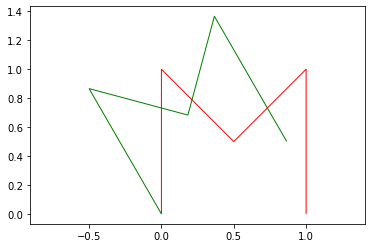

In [9]:


fig, ax = plt.subplots()
plot_path(ax, path, m='r')
plot_path(ax, rotated_path, m='g')
plt.show()

## Can we rotate an image?

In [17]:
FILELOCATION = "umaine.png"
import urllib
with urllib.request.urlopen("https://raw.githubusercontent.com/wecacuee/gazebo_osm/1e7f7a5bfed1e9a1bd60848bbf15d16fc4b1ccbf/testFiles/umaine.png") as uf:
    with open("umaine.png", "wb") as wf:
        wf.write(uf.read())
        

In [6]:
import matplotlib.pyplot as plt
im = plt.imread("umaine.png")

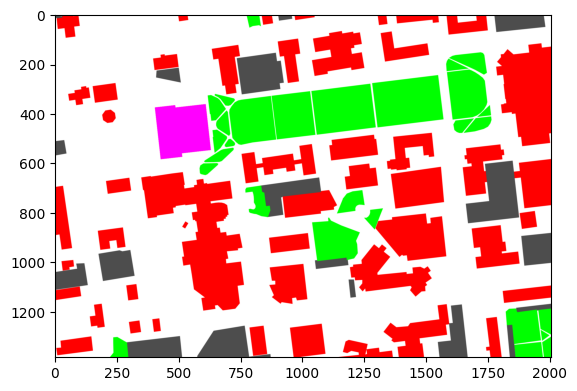

In [7]:
plt.imshow(im)

In [28]:
import numpy as np
# Generate a grid of all coordinates in the image
x, y = np.mgrid[0:im.shape[1], 0:im.shape[0]]

In [29]:
R = rot2D(np.pi/6)

In [30]:
# Concatenate x, y coordinates along the last axis to form vectors
p = np.concatenate((x[..., None], y[..., None]), axis=-1)

In [31]:
# Handle np.matmul quirkiness for matrix vector multiplication, but for 
# all points in the grid.
rotp = (R @ p[..., None])[..., 0]

In [33]:
# Convert the points to nearest integer
rotpi = np.round(rotp).astype('i8')

# Separate x and y
rx = rotpi[..., 0]
ry = rotpi[..., 1]

In [101]:
# make the image slightly bigger to account for the roatated image
rotim = np.zeros((3*im.shape[0]//2, 3*im.shape[1]//2, im.shape[2]))

# Convert x, y to row, col
rr = rotim.shape[0]-ry-1
rfilter = (0 <= rr) & (rr < rotim.shape[0])
rc = rx
cfilter = (0 <= rc) & (rc < rotim.shape[1])
inbounds = rfilter & cfilter

# Generate image within the same bounds
rotim[rr[inbounds], rc[inbounds], :] = im[im.shape[0]-y[inbounds]-1, x[inbounds], :]

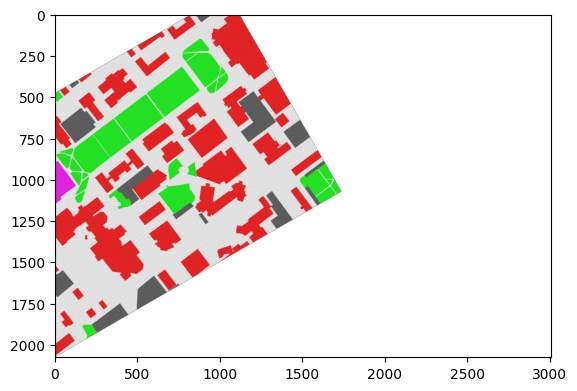

In [102]:
plt.imshow(rotim)

## How to rotate around center then?

Create a new coordinate frame at the center of the object, rotate the coordinates in the new coordinate frame then translate back to the original coordinate frame.

$ \mathbf{p}' = R(\mathbf{p}-\mathbf{t}_{center})+\mathbf{t}_{center} $

In [93]:
def rot2D_around_center(R, points):
    tcenter = np.mean(points, axis=-2, keepdims=True)
    return (R @ (points - tcenter)[..., None] + tcenter)[..., 0]

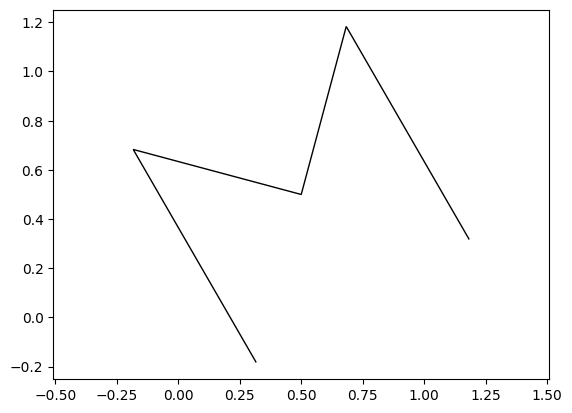

In [97]:
rotpath = rot2D_around_center(rot2D(np.pi/6), path)
plot_path(rotpath)

In [104]:
rotp = rot2D_around_center(rot2D(np.pi/6), p.reshape(-1, 2)).reshape(*p.shape)

In [105]:
# Convert the points to nearest integer
rotpi = np.round(rotp).astype('i8')

# Separate x and y
rx = rotpi[..., 0]
ry = rotpi[..., 1]

In [108]:
# make the image slightly bigger to account for the roatated image
rotim = np.zeros((3*im.shape[0]//2, im.shape[1], im.shape[2]))

# Convert x, y to row, col
rr = rotim.shape[0]-ry-1
rfilter = (0 <= rr) & (rr < rotim.shape[0])
rc = rx
cfilter = (0 <= rc) & (rc < rotim.shape[1])
inbounds = rfilter & cfilter

# Generate image within the same bounds
rotim[rr[inbounds], rc[inbounds], :] = im[im.shape[0]-y[inbounds]-1, x[inbounds], :]

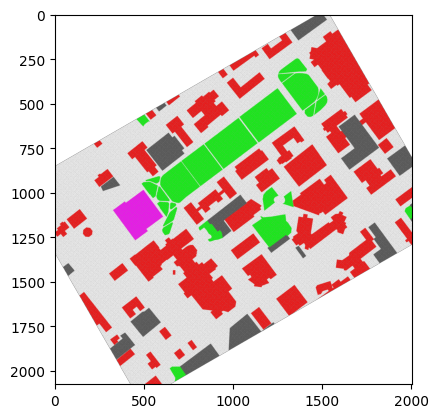

In [109]:
plt.imshow(rotim)